In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'text.usetex': True}) # import to make plots nicer
%config InlineBackend.figure_format = 'svg' # import to make plots nicer
from scipy.integrate import solve_ivp
from matplotlib.lines import Line2D

# Set global font size for title, x-label, and y-label
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16


# Set global font size for x and y tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

# Set global font size for the legend
plt.rcParams['legend.fontsize'] = 16

In [6]:
def CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp):
    cAMP, ACp = x
    dACp = r1 * cAMP * ((ACt - ACp) / K1) - r2 * Dt * ACp / (K2 + ACp)
    dcAMPdT = k1 * ACp - (k3 + k2 * PDEp) * cAMP
    return np.array([dACp, dcAMPdT])

k0, k1, k3, k2 = 0.0, 4.32, 0.58, 3.73
r1, r2, r3, r4 = 0.98, 4.48, 0.1, 0.14
K1, K2, K3, K4 = 2.48, 3.34, 9.24, 7.24
Dt, Et =  2.12, 1.6
ACt = 6.68
PDEt = 4.64

def plot_nullclines(k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp):
    cAMP_vals = np.linspace(-30, 30, 10000)
    dACp_vals = np.linspace(-30, 30, 10000)
    cAMP_grid, dACp_grid = np.meshgrid(cAMP_vals, dACp_vals)

    t = 0
    x = np.array([cAMP_grid, dACp_grid])
    nullclines = CAMP_PDEP(t, x, k1, k3, k2, r1, r2, r3, r4, K1, K2, K3, K4, Dt, Et, ACt, PDEt, PDEp)
    plt.figure(figsize=(8, 6))
    plt.scatter(0, 0, color='black', marker='o', label='Fixed point (0,0,0)', zorder=3)
    #plt.scatter(0.70, 0.69, color='black', marker='o', label='Fixed point (0,0,0)', zorder=3)
    plt.contour(cAMP_grid, dACp_grid, nullclines[0], levels=[0], colors='#1f77b4', linestyles='solid')
    plt.grid(linestyle=':', color='lightgray')
    plt.contour(cAMP_grid, dACp_grid, nullclines[1], levels=[0], colors='green', linestyles='solid')
    plt.xlabel('cAMP')
    plt.ylabel('ACp')

    # Create custom legend handles and labels
    custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                    Line2D([0], [0], color='green', lw=2),
                    Line2D([0], [0], color='black', marker='o', linestyle='None')]
    #plt.legend(custom_lines, ['cAMP', 'ACp', 'Fixed point (0.70,0.69,1.00)'])
    plt.legend(custom_lines, ['cAMP', 'ACp', 'Fixed point (0,0,0)'])
    plt.title(f'ACp and cAMP nullclines with fixed PDEp = {PDEp}')
    plt.ylim(-30, 30)
    plt.xlim(-30,30)
    #plt.ylim(-3, 4)
    #plt.xlim(-5,5)
    plt.savefig(f'Nullclines_for_ACp_and_cAMP_with_PDEp_fixed_at_{PDEp}_big.png', dpi=300)
    plt.show()

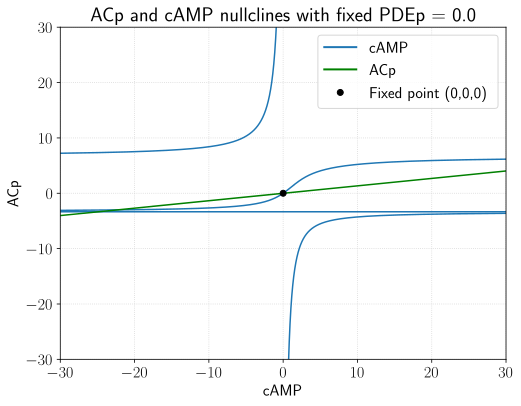

In [7]:
plot_nullclines(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 0.0)

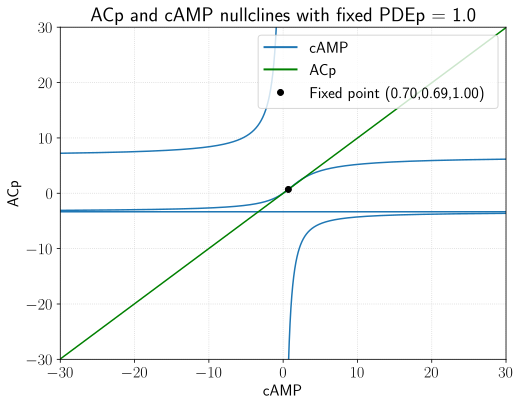

In [18]:
plot_nullclines(4.32, 0.58, 3.73, 0.98, 4.48, 0.1, 0.14, 2.48, 3.34, 9.24, 7.24, 2.12, 1.6, 6.68, 4.64, 1.00)

In [ ]:
A